<p style="font-family: Arial; font-size:3em;color:purple; font-style:bold"><br>
Introduction to Pandas DataFrame<br><br>Week 4
</p><br>


### Pandas consists of:

• A set of labeled array data structures, the primary of which are Series/TimeSeries and DataFrame

• Index objects enabling both simple axis indexing and multi-level (lookups, data alignment, and reindexing)

• An integrated group by engine for aggregating and transforming data sets

• Date range generation (date_range) 

• Input/Output tools: loading tabular data from flat files (CSV, delimited, Excel), and saving and loading
pandas objects from the fast and efficient PyTables/HDF5 format.

• Memory-efficent “sparse” versions of the standard data structures for storing data that is mostly missing or
mostly constant (some fixed value)

• Moving window statistics (rolling mean, rolling standard deviation, etc.)

• Static and moving window linear and panel regression

- [Pandas documentation](http://pandas.pydata.org/pandas-docs/dev)
- [Pandas code repository](https://github.com/pydata/pandas)
- [Pandas code example: Stock price analysis](https://github.com/pydata/pandas/blob/master/examples/finance.py)
- [Pandas code example: Stock price regression](https://github.com/pydata/pandas/blob/master/examples/regressions.py)
- [Clean data with Google Refine](http://code.google.com/p/google-refine/)

## Two types of Data

Numerical 

+ continious

+ discrete

+ interval (calendar, units of temprature)

+ ratio 

Categorical

+ Nominal: Differentiated by names...examples include gender, nationality. Think = or !=

+ Ordinal: Rank Order, Think =, !=, <, >

Can data be sorted...
Blue, Red, Green => [-1, 0, 1] 

The data type is not inherent in the data — it only arises from its context. Think average of 2 zip codes...

### Types of Data
Univariate: single variable

    We typically want to know how individual points are distributed, shape of disribution, whether its symmetric, does it have outliers!


Bivariate: Two variables. 

    We usually want to know whether there is a relationship between 2 quantities. 


Multivariate: > 2 variables.

    We typically want to find a smaller group of variables that still contains most of the info in the data set.


## Questions about data sets

Num of records

Num of data fields

Does data fit into memory? single disk? disk array? 

How many missing values? Junk values?

How many duplicates?

Are there labels (for dependent variable)?

Are there keys?

** May have to format & normalize data (timezones, monetary unit values etc...)


## Questions about data fields

### Data fields
What is the mean, variance, mode, median...?

What is the distribution? Hint: Plot historgram

What are extreme values, missing values, unusual values?


### Pairs of data fields
What is the correlation? Plot scatter plot

### Visualize the data  

Histograms, scatter plots, etc...
You can produce plots, but not be able to print them


Sample Data

Randomly pick some of the records.

### Take care of your data
All data sets are self-explanatory and reproducible.

To ensure data is self-explanatory, include all the information necessary to make sense of it.
 
To ensure data is reproducible, keep track of its source and the cleaning and conditioning transformations (original data set if you have merged data sets).
  

### Data Analysis Motivation

#### Use Case Fraud Detection

Events: Credit card transactions

Entities: Credit card accounts

Features: # of transactions past 10 minutes

Models: CART (Classification and regression trees)

Scores: Likelihood of fraudulent account



### Use Case Online Adv

Events: Impressions & clicks

Entities: Cookies, user IDs

Features: # of impressions per category

Models: Clusters, trees, recommendation

Scores: Likelihood of clicking 

Ask for more Data

Ask for more Orthogonal Data

In [1]:
x = 34 - 23 # A comment.
y = "Hello" # Another one.
z = 3.45 
if z == 3.45 or y == "Hello":
    x = x + 977
    y = y + " World!" # String concat.
print(x)
print(y)

988
Hello World!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Series

In [4]:
np.random.randn() # Return a sample (or samples) from the “standard normal” distribution.

-0.721181585932467

In [3]:
## For random samples from N(mu,sigma^2), use:
## sigma * np.random.randn(...) + mu
### Two-by-four array of samples from N(3, 6.25):
2.5 * np.random.randn(2, 4) + 3

array([[-0.39593776,  1.63837973,  0.19476416,  1.55366562],
       [ 2.12739552,  6.57377803,  5.36650589,  7.47989246]])

#### Series

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

s = Series(data, index=index)

In [6]:

# data => a Python dict, an ndarray, a scalar value 
# NaN for missing data
sample_series = pd.Series(np.random.randn(5), index=['val 1', 'val 2', 'val 3', 'val 4', 'val 5'])
sample_series

val 1    0.922560
val 2    1.041456
val 3   -0.632418
val 4    0.254739
val 5   -0.740740
dtype: float64

In [7]:
sample_series.values

array([ 0.92255959,  1.04145642, -0.63241786,  0.25473932, -0.74073976])

### From dict

If data is a dict, if index is passed the values in data corresponding to the labels in the index will be pulled out. Otherwise, an index will be constructed from the sorted keys of the dict, if possible.

In [10]:
d = {'val 1' : 0., 'val 2' : 1., 'val 3' : 2.}
s1= pd.Series(d)
print(s1)
print()
s1.index

val 1    0.0
val 2    1.0
val 3    2.0
dtype: float64



Index(['val 1', 'val 2', 'val 3'], dtype='object')

In [10]:
sample_series[0]

1.583715550039045

In [11]:
sample_series[sample_series > sample_series.median()]

val 1    1.583716
val 5    0.941874
dtype: float64

In [12]:
np.exp(sample_series)

val 1    4.873028
val 2    0.969607
val 3    0.503371
val 4    2.299809
val 5    2.564783
dtype: float64

In [13]:
sample_series

val 1    1.583716
val 2   -0.030864
val 3   -0.686428
val 4    0.832826
val 5    0.941874
dtype: float64

In [14]:
# compute the percent change over a given number of periods
sample_series.pct_change()

val 1          NaN
val 2    -1.019488
val 3    21.240301
val 4    -2.213274
val 5     0.130937
dtype: float64

In [15]:
sample_series2 = pd.Series(randn(6))
sample_series3 = pd.Series(randn(6))
sample_series2.cov(sample_series3)

0.8603487111080218

## DataFrame

#### DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.

DataFrame is one of : 
*  Dict of 1D ndarrays, lists, dicts, or Series
*  2-D numpy.ndarray
*  Structured or record ndarray
*  A Series
*  Another DataFrame

In [14]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
print(d)
type(d)

{'one': a    1.0
b    2.0
c    3.0
dtype: float64, 'two': a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64}


dict

In [15]:
df = pd.DataFrame(d, index=['d', 'b', 'a','c'], columns=['one', 'two'])
df

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0
c,3.0,3.0


In [16]:
df.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [39]:
df.columns

Index([one, two], dtype=object)

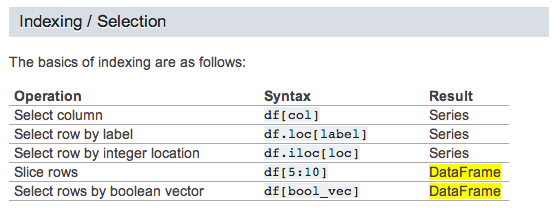

In [47]:
# Column selection, addition, deletion
Image(filename='data/ind_sel.png')

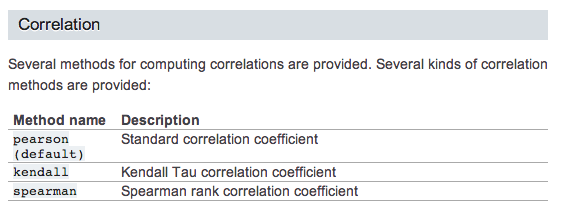

In [41]:
Image(filename='data/correlation.png')

In [48]:
df['three'] = df['two'] * 2
df

,one,two,three
d,NaN,4,8
b,2,2,4
a,1,1,2


In [49]:
df['flag'] = df['two'] > 2
df

,one,two,three,flag
d,NaN,4,8,True
b,2,2,4,False
a,1,1,2,False


In [50]:
df = pd.DataFrame(randn(10, 4), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(randn(7, 3), columns=['A', 'B', 'C'])
df + df2


,A,B,C,D
0,-0.837710,1.362020,2.190839,NaN
1,-0.561747,-0.205782,-3.197528,NaN
2,0.290202,-0.389255,-1.146254,NaN
3,-0.099179,0.221975,-1.525860,NaN
4,-1.216379,-0.186940,0.258686,NaN
5,-0.754142,-1.810639,0.508232,NaN
6,0.515946,-0.239984,0.747752,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


- [NumPy Broadcasting](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

In [51]:
# transpose first 5 rows
df[:5].T

,0,1,2,3,4
A,-0.701839,-0.352239,0.168684,0.323164,-0.276530
B,0.424179,-0.090045,-2.012156,0.333679,-0.993900
C,0.969552,-2.123662,-0.482454,-1.524441,0.436182
D,0.193336,0.039856,-0.448875,-0.530219,0.346277


## Panel 
less-used, container for 3-dimensional data

In [53]:
# items: axis 0, each item corresponds to a DataFrame contained inside
# major_axis: axis 1, it is the index (rows) of each of the DataFrames
# minor_axis: axis 2, it is the columns of each of the DataFrames
wp = pd.Panel(randn(2, 5, 4), items=['Item1', 'Item2'],
         major_axis=pd.date_range('1/1/2000', periods=5),
         minor_axis=['A', 'B', 'C', 'D'])
wp

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 2000-01-01 00:00:00 to 2000-01-05 00:00:00
Minor_axis axis: A to D

In [54]:
wp['Item1']

,A,B,C,D
2000-01-01,1.318086,0.262673,0.964613,-0.071859
2000-01-02,-0.221876,-0.839133,-1.162672,-0.176416
2000-01-03,0.311523,-0.248981,0.711103,-0.007247
2000-01-04,0.465819,-1.435261,-1.071583,-2.272159
2000-01-05,-1.180359,-1.718676,2.485351,0.945967


In [55]:
wp['Item2']

,A,B,C,D
2000-01-01,-1.676086,-0.621843,-0.590170,0.458871
2000-01-02,-0.186563,-0.784361,0.612034,-0.751312
2000-01-03,-0.574059,-0.524901,-0.704731,-1.337540
2000-01-04,-0.190683,-0.359239,1.270178,1.277753
2000-01-05,1.386356,0.823776,-0.674059,1.107486


### Pandas aligns labelled data

In [63]:
cd data/

/Users/Babalu/Documents/data_analysis/meetup/data


In [64]:
import pandas as pd 
from pandas import Series, DataFrame, Panel
from IPython.display import HTML

In [65]:
dataset = 'Pandas'
users = pd.read_csv('AUDUSD_Ticks.csv')

In [66]:
users

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58460 entries, 0 to 58459
Data columns (total 5 columns):
Time         58460  non-null values
Ask          58460  non-null values
Bid          58460  non-null values
AskVolume    58460  non-null values
BidVolume    58460  non-null values
dtypes: float64(4), object(1)

### Series is a list with labelled items

In [69]:
# Series({...})
users.Bid

0     1.02727
1     1.02727
2     1.02727
3     1.02726
4     1.02729
5     1.02728
6     1.02728
7     1.02726
8     1.02726
9     1.02726
10    1.02726
11    1.02727
12    1.02726
13    1.02727
14    1.02727
...
58445    1.02562
58446    1.02562
58447    1.02564
58448    1.02567
58449    1.02564
58450    1.02562
58451    1.02561
58452    1.02561
58453    1.02558
58454    1.02559
58455    1.02559
58456    1.02557
58457    1.02557
58458    1.02556
58459    1.02558
Name: Bid, Length: 58460, dtype: float64

In [70]:
users.Bid[4]

1.02729

### DataFrame is a table with labelled columns and rows

In [71]:
bid_ask_prices = DataFrame(dict(
    bid=users.Bid,
    ask=users.Ask))

HTML(bid_ask_prices.head(10).to_html())

,ask,bid
0,1.02741,1.02727
1,1.02742,1.02727
2,1.02741,1.02727
3,1.02741,1.02726
4,1.02742,1.02729
5,1.02742,1.02728
6,1.02742,1.02728
7,1.02742,1.02726
8,1.02742,1.02726
9,1.02742,1.02726


In [72]:
bid_ask_prices[:3]

,ask,bid
0,1.02741,1.02727
1,1.02742,1.02727
2,1.02741,1.02727


In [100]:
bid_ask_volume = DataFrame(dict(
    bid=users.BidVolume,
    ask=users.AskVolume))

HTML(bid_ask_volume.head(10).to_html())

,ask,bid
0,1.50,3.00
1,1.50,1.50
2,1.50,1.50
3,1.50,2.63
4,1.50,1.50
5,2.25,1.50
6,3.00,1.50
7,3.00,5.25
8,3.00,5.25
9,2.25,3.75


### Panel is a collection of labelled tables

In [101]:
bid_ask_panel = Panel(dict(
    prices=bid_ask_prices,
    volume=bid_ask_volume))

bid_ask_panel['volume'] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58460 entries, 0 to 58459
Data columns (total 2 columns):
ask    58460  non-null values
bid    58460  non-null values
dtypes: float64(2)

Becareful of using `len()` to find the number of rows in a `DataFrame` inside a `Panel`.  

`Panel` will pad non-matching rows and columns across `DataFrames` with `NaN` and `len()` will include padded rows.  Instead, use `DataFrame.count()`.

### Reindexing

In [84]:
df = DataFrame(np.array(xrange(1,10)).reshape(3,3), index='x y z'.split(), columns='a b c'.split())
print df.cumsum()

    a   b   c
x   1   2   3
y   5   7   9
z  12  15  18


In [86]:
df1 = df.reindex(index=list('zyx'), columns=list('cab'))
df1

,c,a,b
z,9,7,8
y,6,4,5
x,3,1,2


In [87]:
df2 = DataFrame(np.array(range(1, 10)).reshape(3,3), index=list('zyx'), columns=list('cba'))
df2

,c,b,a
z,1,2,3
y,4,5,6
x,7,8,9


In [88]:
df2.reindex_like(df1)

,c,a,b
z,1,3,2
y,4,6,5
x,7,9,8


### Aggregation

In [90]:
df = DataFrame(dict(
    Position=['Point Guard', 'Forward', 'Shooting Guard', 'Center'],
    YrsOfExperience=[8, 9, 10, 7], 
    score=[18, 13, 20, 15]))
df

,Position,YrsOfExperience,score
0,Point Guard,8,18
1,Forward,9,13
2,Shooting Guard,10,20
3,Center,7,15


In [91]:
df.groupby('Position').mean()

,YrsOfExperience,score
Position,,
Center,7,15
Forward,9,13
Point Guard,8,18
Shooting Guard,10,20


In [92]:
df.groupby('YrsOfExperience').mean()

,score
YrsOfExperience,
7,15
8,18
9,13
10,20


In [98]:
print df.groupby('YrsOfExperience').aggregate([np.sum, np.mean, np.max, np.min])

                 score                  
                   sum  mean  amax  amin
YrsOfExperience                         
7                   15    15    15    15
8                   18    18    18    18
9                   13    13    13    13
10                  20    20    20    20


In [99]:
df.groupby('Position').describe()

YrsOfExperience  score
Position                                    
Center         count                1      1
               mean                 7     15
               std                NaN    NaN
               min                  7     15
               25%                  7     15
               50%                  7     15
               75%                  7     15
               max                  7     15
Forward        count                1      1
               mean                 9     13
               std                NaN    NaN
               min                  9     13
               25%                  9     13
               50%                  9     13
               75%                  9     13
               max                  9     13
Point Guard    count                1      1
               mean                 8     18
               std                NaN    NaN
               min                  8     18
               25%                  8     18
               50%                  8     18
               75%                  8     18
               max                  8     18
Shooting Guard count                1      1
               mean                10     20
               std                NaN    NaN
               min                 10     20
               25%                 10     20
               50%                 10     20
               75%                 10     20
               max                 10     20

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Creating a Series by passing a list of values, 
### letting pandas create a default integer index
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [17]:
### Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns

dates = pd.date_range('20170405', periods=6)
dates


DatetimeIndex(['2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08',
               '2017-04-09', '2017-04-10'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2017-04-05,0.564865,-0.600833,-1.426646,-0.383612
2017-04-06,-1.633046,-1.087281,2.790217,-1.612393
2017-04-07,0.347668,2.290625,0.362571,0.698967
2017-04-08,-0.546568,-0.624001,1.068344,0.238717
2017-04-09,-0.037939,-0.240916,-0.158730,-1.035765
2017-04-10,1.061027,0.938958,-0.243247,2.356058


In [19]:
### Creating a DataFrame by passing a dict of objects that can be converted to series-like.

df2 = pd.DataFrame({ 'A' : 1.,
                      'B' : pd.Timestamp('20130102'),
                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                      'D' : np.array([3] * 4,dtype='int32'),
                      'E' : pd.Categorical(["test","train","test","train"]),
                      'F' : 'foo' })
 
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo
